程式碼來源:https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network/notebook

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#from keras.datasets import mnist
np.random.seed(10)
import matplotlib.patheffects as PathEffects
from sklearn.manifold import TSNE

In [7]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Y_train = train['label'].values.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')

Y_train value form: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Which is 0 (1 in [0] position of the vector).


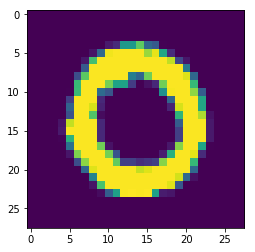

In [8]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
#plt.show()

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Text(0,0.5,'Cumulative explained variance')

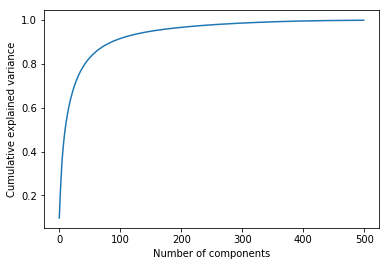

In [10]:
pca = PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [16]:
NCOMPONENTS = 400

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(42000, 784)
(42000, 400)


In [17]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [18]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)

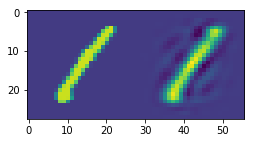

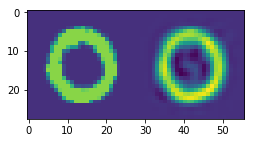

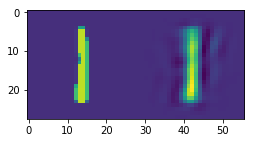

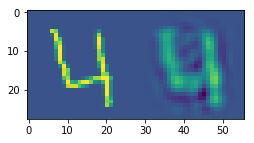

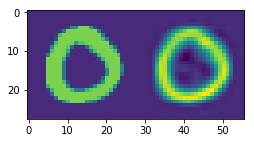

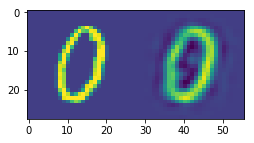

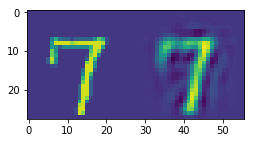

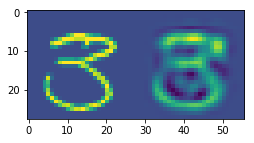

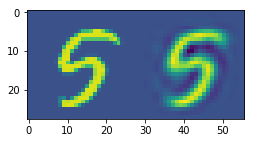

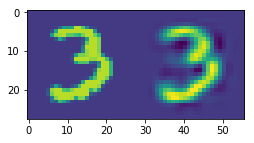

In [14]:
for index in range(0,10):
    side_by_side(index)

In [19]:
model = Sequential()
layers = 1
units = 128
#用2層fully connect全連接層(不含Input層)做NN
model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
#加bias
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
 - 2s - loss: 1.4042 - categorical_accuracy: 0.6093 - val_loss: 0.3308 - val_categorical_accuracy: 0.9090
Epoch 2/100
 - 1s - loss: 0.4976 - categorical_accuracy: 0.8618 - val_loss: 0.2454 - val_categorical_accuracy: 0.9295
Epoch 3/100
 - 1s - loss: 0.3549 - categorical_accuracy: 0.8955 - val_loss: 0.2062 - val_categorical_accuracy: 0.9384
Epoch 4/100
 - 1s - loss: 0.2714 - categorical_accuracy: 0.9183 - val_loss: 0.1878 - val_categorical_accuracy: 0.9460
Epoch 5/100
 - 1s - loss: 0.2250 - categorical_accuracy: 0.9305 - val_loss: 0.1619 - val_categorical_accuracy: 0.9516
Epoch 6/100
 - 1s - loss: 0.1919 - categorical_accuracy: 0.9392 - val_loss: 0.1519 - val_categorical_accuracy: 0.9567
Epoch 7/100
 - 1s - loss: 0.1646 - categorical_accuracy: 0.9487 - val_loss: 0.1433 - val_categorical_accuracy: 0.9567
Epoch 8/100
 - 1s - loss: 0.1490 - categorical_accuracy: 0.9531 - val_loss: 0.1359 - val_categorical_accuracy: 0.9603
Epoch 9

Epoch 70/100
 - 1s - loss: 0.0094 - categorical_accuracy: 0.9972 - val_loss: 0.1972 - val_categorical_accuracy: 0.9730
Epoch 71/100
 - 1s - loss: 0.0092 - categorical_accuracy: 0.9976 - val_loss: 0.2063 - val_categorical_accuracy: 0.9713
Epoch 72/100
 - 1s - loss: 0.0101 - categorical_accuracy: 0.9969 - val_loss: 0.1878 - val_categorical_accuracy: 0.9738
Epoch 73/100
 - 1s - loss: 0.0110 - categorical_accuracy: 0.9969 - val_loss: 0.1947 - val_categorical_accuracy: 0.9732
Epoch 74/100
 - 1s - loss: 0.0090 - categorical_accuracy: 0.9975 - val_loss: 0.1974 - val_categorical_accuracy: 0.9729
Epoch 75/100
 - 1s - loss: 0.0103 - categorical_accuracy: 0.9970 - val_loss: 0.2058 - val_categorical_accuracy: 0.9730
Epoch 76/100
 - 1s - loss: 0.0108 - categorical_accuracy: 0.9969 - val_loss: 0.1990 - val_categorical_accuracy: 0.9725
Epoch 77/100
 - 1s - loss: 0.0095 - categorical_accuracy: 0.9971 - val_loss: 0.1873 - val_categorical_accuracy: 0.9730
Epoch 78/100
 - 1s - loss: 0.0089 - categorical_

In [20]:
predictions = model.predict_classes(X_pca_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "pca-keras-mlp.csv")

In [21]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
gaussian_noise_4 (GaussianNo (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 69,130
Trainable params: 69,130
Non-trainable params: 0
_________________________________________________________________
None


先不要執行這行

In [22]:
#之前MNIST做的CNN
#C1:input_size=28*28,filters=16,output_size=28*28,padding="same"邊界補0,使維度不變,會有16個28*28的影像
C_1=model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(10,10),padding="same",activation='relu'))
#P1:把C1產出的16個影像降維成14*14
model.add(MaxPooling2D(pool_size=(2,2)))
#C2:把P1產出的16個影像轉換成36個,維度保持14*14,kernel_size是濾鏡大小
C_2=model.add(Conv2D(filters=48,kernel_size=(5,5),padding="same",activation='relu'))
#P2:把C2產出的36個影像降維成7*7
model.add(MaxPooling2D(pool_size=(2,2)))
#每次訓練迭代時隨機放棄25%的神經元避免overfitting
C_3=model.add(Conv2D(filters=64,kernel_size=(5,5),padding="same",activation='relu'))
model.add(Dropout(0.25))
#Flatten:P2產出36個7*7的影像,拉平成36*7*7=1764維的向量
model.add(Flatten())
#Hidden:共128個神經元,Dende:Fully Connected
D_1=model.add(Dense(1024,activation="relu"))
#每次訓練迭代時隨機放棄50%的神經元避免overfitting
model.add(Dropout(0.5))
#Output:共10個神經元對應0~9
D_2=model.add(Dense(10,activation='softmax'))

ValueError: Input 0 is incompatible with layer conv2d_1: expected ndim=4, found ndim=2